In [7]:
library(boot)
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=4)

In [8]:
loans_income <- read.csv(file.path( 'data', 'loans_income.csv'))[,1]
sp500_px <- read.csv(file.path('data', 'sp500_data.csv'))


In [37]:
## Bootstrap of the median
stat_fun <- function(x, idx) median(x[idx])
boot_obj <- boot(loans_income, R = 1000, statistic=stat_fun)
boot_obj


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = loans_income, statistic = stat_fun, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1*    62000 -68.7165    205.2583

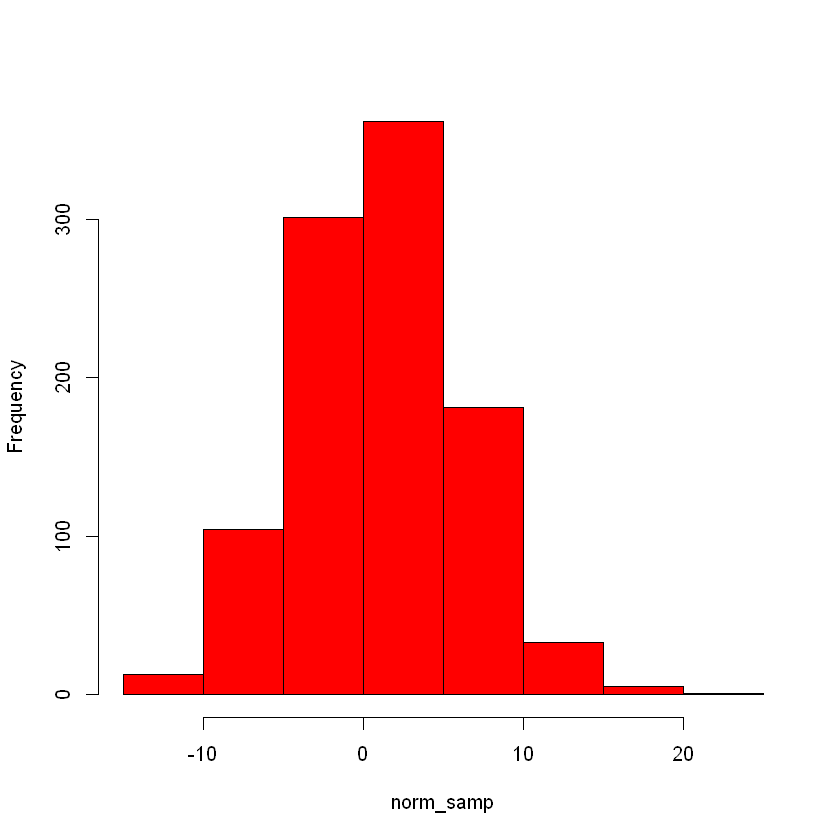

In [2]:
# Normal distribution
norm_samp <- rnorm(1000, 1,5)
hist(norm_samp, col='red', main='')

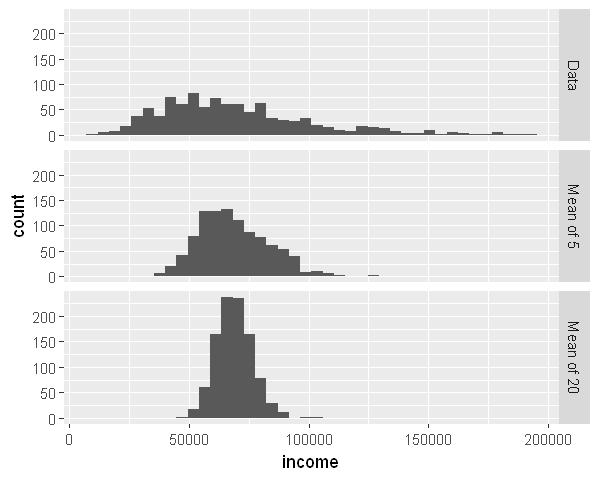

In [15]:
# take a simple random sample
samp_data <- data.frame(income=sample(loans_income, 1000), 
                        type='data_dist')
# take a sample of means of 5 values
samp_mean_05 <- data.frame(
  income = tapply(sample(loans_income, 1000*5), 
                  rep(1:1000, rep(5, 1000)), FUN=mean),
  type = 'mean_of_5')
# take a sample of means of 20 values
samp_mean_20 <- data.frame(
  income = tapply(sample(loans_income, 1000*20), 
                  rep(1:1000, rep(20, 1000)), FUN=mean),
  type = 'mean_of_20')
# bind the data.frames and convert type to a factor
income <- rbind(samp_data, samp_mean_05, samp_mean_20)
income$type = factor(income$type, 
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))
# plot the histograms
ggplot(income, aes(x=income)) +
  geom_histogram(bins=40) +
  facet_grid(type ~ .)

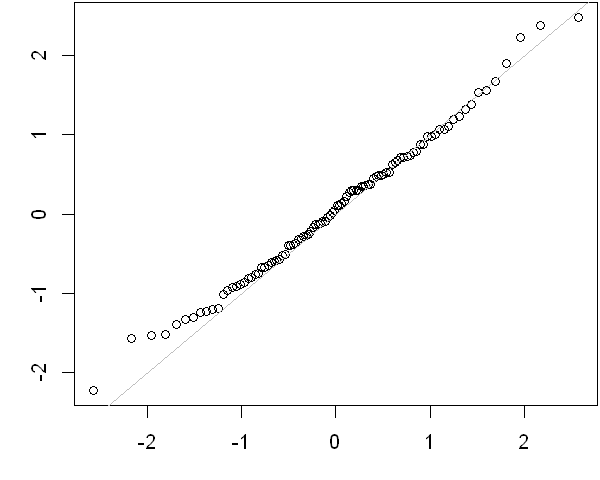

In [45]:
## QQ=Plot normal data
norm_samp <- rnorm(100)
par(mar=c(3, 3, 0, 0)+.1)
qqnorm(norm_samp, main='', xlab='', ylab='')
abline(a=0, b=1, col='grey')

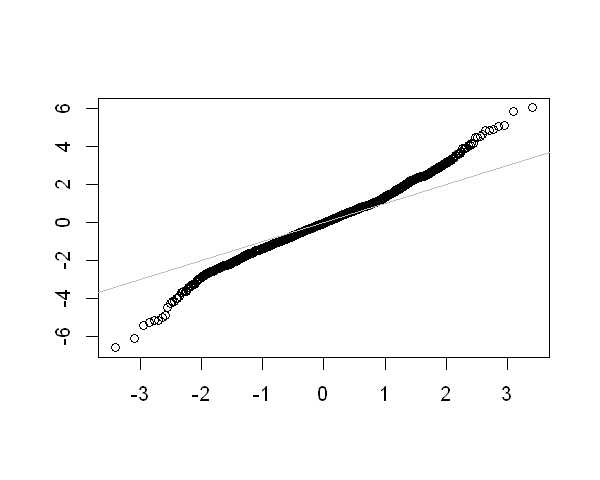

In [47]:
## QQ=Plot not normal data
nflx <- sp500_px[,'NFLX']
nflx <- diff(log(nflx[nflx>0]))
qqnorm(nflx, main='', xlab='', ylab='')
abline(a=0, b=1, col='grey')

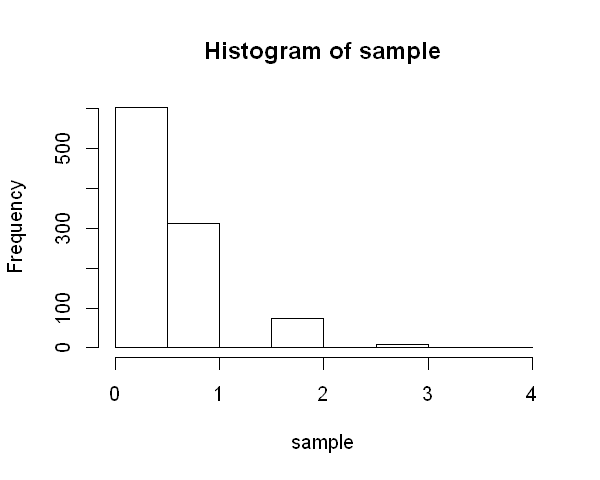

In [36]:
# Binomial distribution 
#dbinom(x=2,size=5,p=0.1)
#pbinom(2,5,0.1)

sample <- rbinom(1000,5,0.1)
hist(sample)

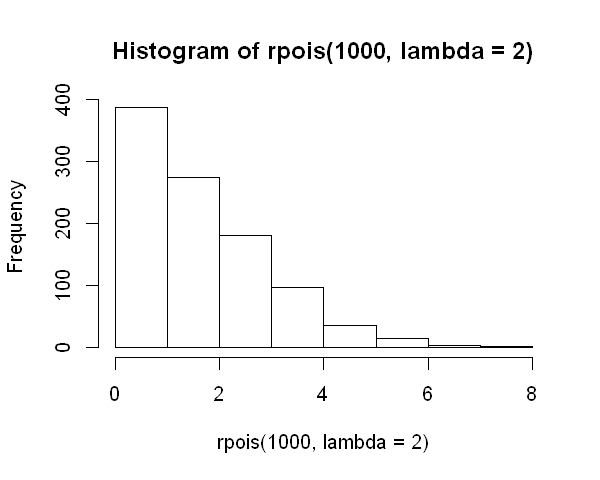

In [41]:
# Poisson distribution
hist(rpois(1000, lambda = 2))

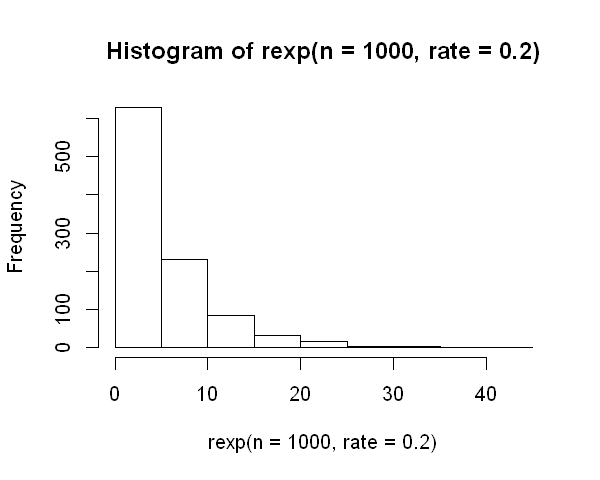

In [42]:
# Exponential distribution
hist(rexp(n=1000,rate = .2))

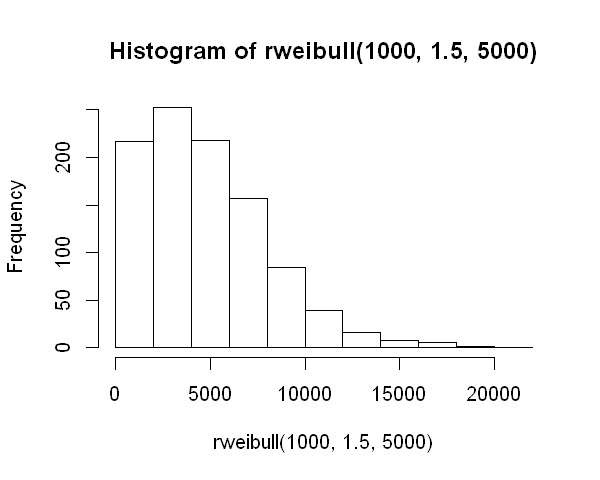

In [43]:
# Weibull distribution
hist(rweibull(1000,1.5,5000))